In [1]:
!pip install xgboost==1.7.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 6.2 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [2]:
from xgboost import XGBClassifier
import joblib
import pickle
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction import FeatureHasher
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, confusion_matrix
import itertools

In [3]:
# data preprocessing

# read files
train = pd.read_csv("Training Data.csv")
test = pd.read_csv("Test Data.csv")
# drop columns
train.drop(['CITY', 'Id'], inplace=True, axis=1)
test.drop(['CITY', 'ID'], inplace=True, axis=1)
test_copy = test.copy()

# do one-hot encoding
train = pd.get_dummies(train, columns=['Married/Single', 'House_Ownership', 'Car_Ownership', 'STATE'])
test = pd.get_dummies(test, columns=['Married/Single', 'House_Ownership', 'Car_Ownership', 'STATE'])

# find existing patterns in the dataset
pattern = {"others": 0}
for row in train['Profession']:
  arr = re.split('_', row)
  for e in arr:
    pattern[e] = 0

# feature hashing
def FH(dataset, pattern):
  # calculate vector of all rows(train)
  occurrence = []

  for row in dataset['Profession']:
    arr = re.split('_', row)
    cur_pattern = pattern.copy()
    for e in arr:
      if e in cur_pattern:
        cur_pattern[e] = cur_pattern[e] + 1
      else:
        cur_pattern['others'] = cur_pattern['others'] + 1
    occurrence.append(cur_pattern)

  # do feature hashing
  h = FeatureHasher(len(pattern), dtype=int)
  return h.fit_transform(occurrence).toarray()

train['Profession'] = FH(train, pattern)
test['Profession'] = FH(test, pattern)

In [4]:
def preprocess(data):
  tmp = test_copy.copy()
  tmp.loc[len(tmp)] = data
  tmp = pd.get_dummies(tmp, columns=['Married/Single', 'House_Ownership', 'Car_Ownership', 'STATE'])
  tmp['Profession'] = FH(tmp, pattern)
  return tmp.to_numpy()

In [5]:
with open('test.npy', 'rb') as f:
    x_test = np.load(f)
    y_test = np.load(f)

In [6]:
#load model1
model1 = XGBClassifier()
model1.load_model("XGBoost.json")

#load model2
model2 = joblib.load('random_forest.joblib')

#load model3
model3 = pickle.load(open('Adaboost.sav', 'rb'))

#load model4
model4 = pickle.load(open('DNN.sav', 'rb'))

models = dict({'XGBoost':model1, 'Random Forest':model2, 'Adaboost':model3, 'DNN':model4})

# calculate score of each model
scores = list()
predictions = list()
for model in models:
  try:
    scores.append(models[model].score(x_test, y_test))
    predictions.append(models[model].predict(x_test))
  except:
    scores.append(models[model].evaluate(x_test, y_test)[1])
    predictions.append(models[model].predict(x_test).flatten())

predictions[3] = predictions[3]>0.5

1575/1575 [==============================] - 2s 1ms/step


In [7]:
avg = np.average(predictions, axis=0, weights=scores)>0.5
accuracy = np.sum(avg==y_test)/len(y_test)
print(accuracy)

0.8973015873015873


In [8]:
marry = dict({'0': 'single', '1': 'married'})
house = dict({'0': 'rented', '1': 'owned', '2': 'norent_noown'})
car = dict({'0': 'no', '1': 'yes'})

請輸入您想要查看的資訊。
0:預測
1:模型資訊
1


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


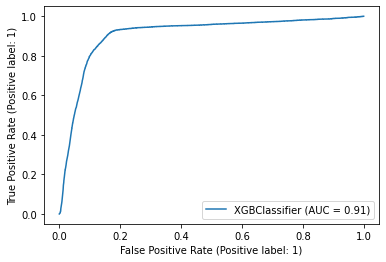

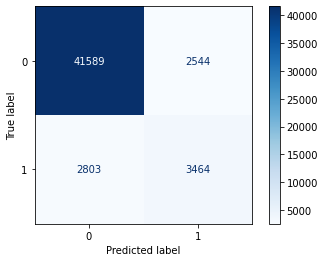

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


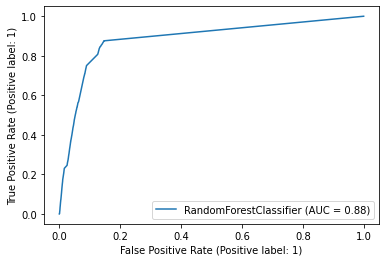

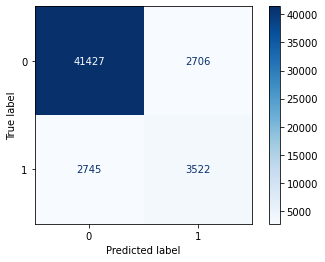

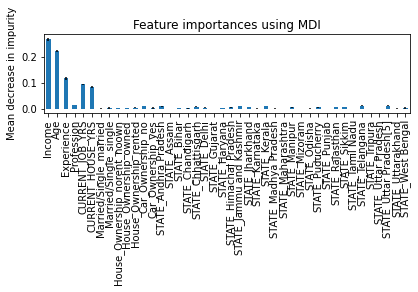

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


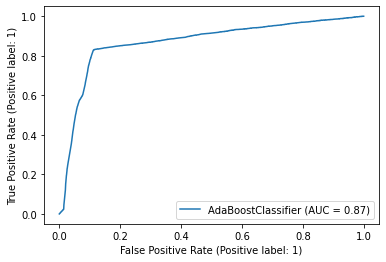

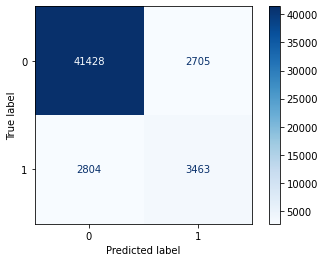

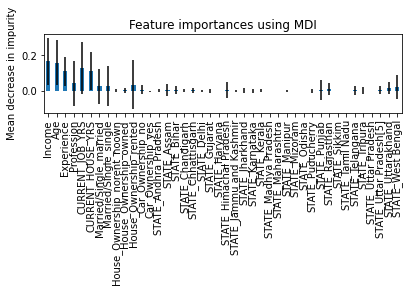

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


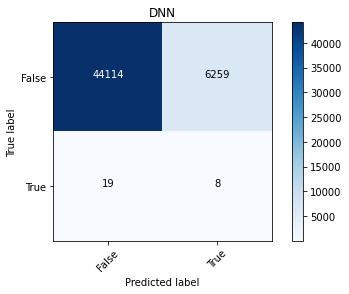

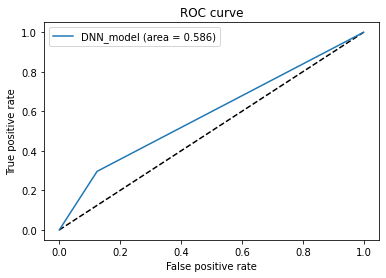

In [12]:
cmd = int(input("請輸入您想要查看的資訊。\n0:預測\n1:模型資訊\n"))
if cmd==0:
  income=int(int(input("請輸入年收入:\n"))*2.7)
  age=int(input("請輸入年齡:\n"))
  exp=int(input("請輸入工作年資:\n"))
  married=marry[input("請輸入結婚與否:\n0: 未婚\n1: 已婚\n")]
  house_ownership=house[input("請輸入居住狀況:\n0: 租房\n1: 擁有自己的房子\n2: 沒有租房也沒有自己的房子\n")]
  car_ownership=car[input("請輸入是否有車:\n0: 沒有\n1: 有\n")]
  profession=input("請輸入職業:\n")
  job_yr=int(input("請輸入目前的工作做了多少年:\n"))
  house_yr=int(input("請輸入在目前的房子居住了幾年:\n"))
  data=[income, age, exp, married, house_ownership, car_ownership, profession, "Kerala", job_yr, house_yr]
  prep = preprocess(data)
  pred = []
  for model in models:
    p = models[model].predict(prep)[-1]
    pred.append(p)
    print("model", model, "thinks that the target have", "no" if p<0.5 else "", "potential risk")
  print("On Average: the target have", "no" if np.average(pred, weights=scores)<0.5 else "", "potential risk")
elif cmd==1:
  for model in models:
    try:
      plot_roc_curve(models[model], x_test, y_test)
      Y_pred = models[model].predict(x_test)

      # confusion matrix
      cm = plot_confusion_matrix(models[model], x_test, y_test, cmap=plt.cm.Blues)
      cm.figure_.savefig('confusion_matrix.png')

      # feature importance
      importances = models[model].feature_importances_
      std = np.std([tree.feature_importances_ for tree in models[model].estimators_], axis=0)

      feature_names = test.columns
      forest_importances = pd.Series(importances, index=feature_names)
      fig, ax = plt.subplots()
      forest_importances.plot.bar(yerr=std, ax=ax)
      ax.set_title("Feature importances using MDI")
      ax.set_ylabel("Mean decrease in impurity")
      fig.tight_layout()
      plt.show()
    except:
      plt.show()
      continue
      
  # plot confusion matrix for DNN
  cm = confusion_matrix(predictions[3], y_test)
  plt.figure()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title("DNN")
  plt.colorbar()
  tick_marks = np.arange(len([False, True]))
  plt.xticks(tick_marks, [False, True], rotation=45)
  plt.yticks(tick_marks, [False, True])

  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  
  from sklearn.metrics import roc_curve
  fpr_model, tpr_model, thresholds_keras = roc_curve(predictions[3], y_test)
  from sklearn.metrics import auc
  auc_model = auc(fpr_model, tpr_model)
  plt.figure(1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr_model, tpr_model, label='DNN_model (area = {:.3f})'.format(auc_model))
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.show()

else:
  print("輸入錯誤!")